In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
%matplotlib inline


In [29]:
datasetTrain = "../data/Training Dataset.csv"
df = pd.read_csv(datasetTrain)
df.head()

,Condition No. 1,Condition No. 2,Condition No. 3,Condition No. 4,Condition No. 5,Condition No. 6,Condition No. 7,Condition No. 8,Condition No. 9,Condition No. 10,...,Condition No. 25,Condition No. 26,Condition No. 27,Condition No. 28,Condition No. 29,Condition No. 37,Condition No. 35,Condition No. 41,Condition No. 42,Targetted Condition No. 1
0,3687.5,4510.6,9.3160,26.734,42.511,74.935,120.42,0.33407,80.345,24.203,...,4.9187,2.3120,0.018975,0.84982,0.107870,53.729,43.107,130.439769,1975.095664,3098.8
1,3685.5,4511.5,9.3103,26.661,42.478,75.888,120.41,0.32859,79.935,26.669,...,4.7347,2.2965,0.021290,0.85223,0.119180,54.179,45.041,130.296577,1975.105411,3113.9
2,3682.8,4570.5,9.2759,26.653,42.224,75.779,120.43,0.35016,80.379,23.216,...,4.8275,2.2578,0.015472,0.81907,0.098032,54.413,42.933,130.280885,1975.091763,3100.0
3,3573.8,4547.2,9.3265,26.517,42.246,74.906,120.38,0.33413,80.407,25.154,...,4.8399,2.3040,0.007096,0.84621,0.101700,53.603,44.186,130.014115,1975.099423,3102.7
4,3644.3,4530.7,9.3318,27.119,42.199,75.036,120.42,0.34601,80.233,24.941,...,4.8477,2.2572,0.023564,0.83298,0.097448,52.915,43.488,131.194962,1975.098581,3107.4


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

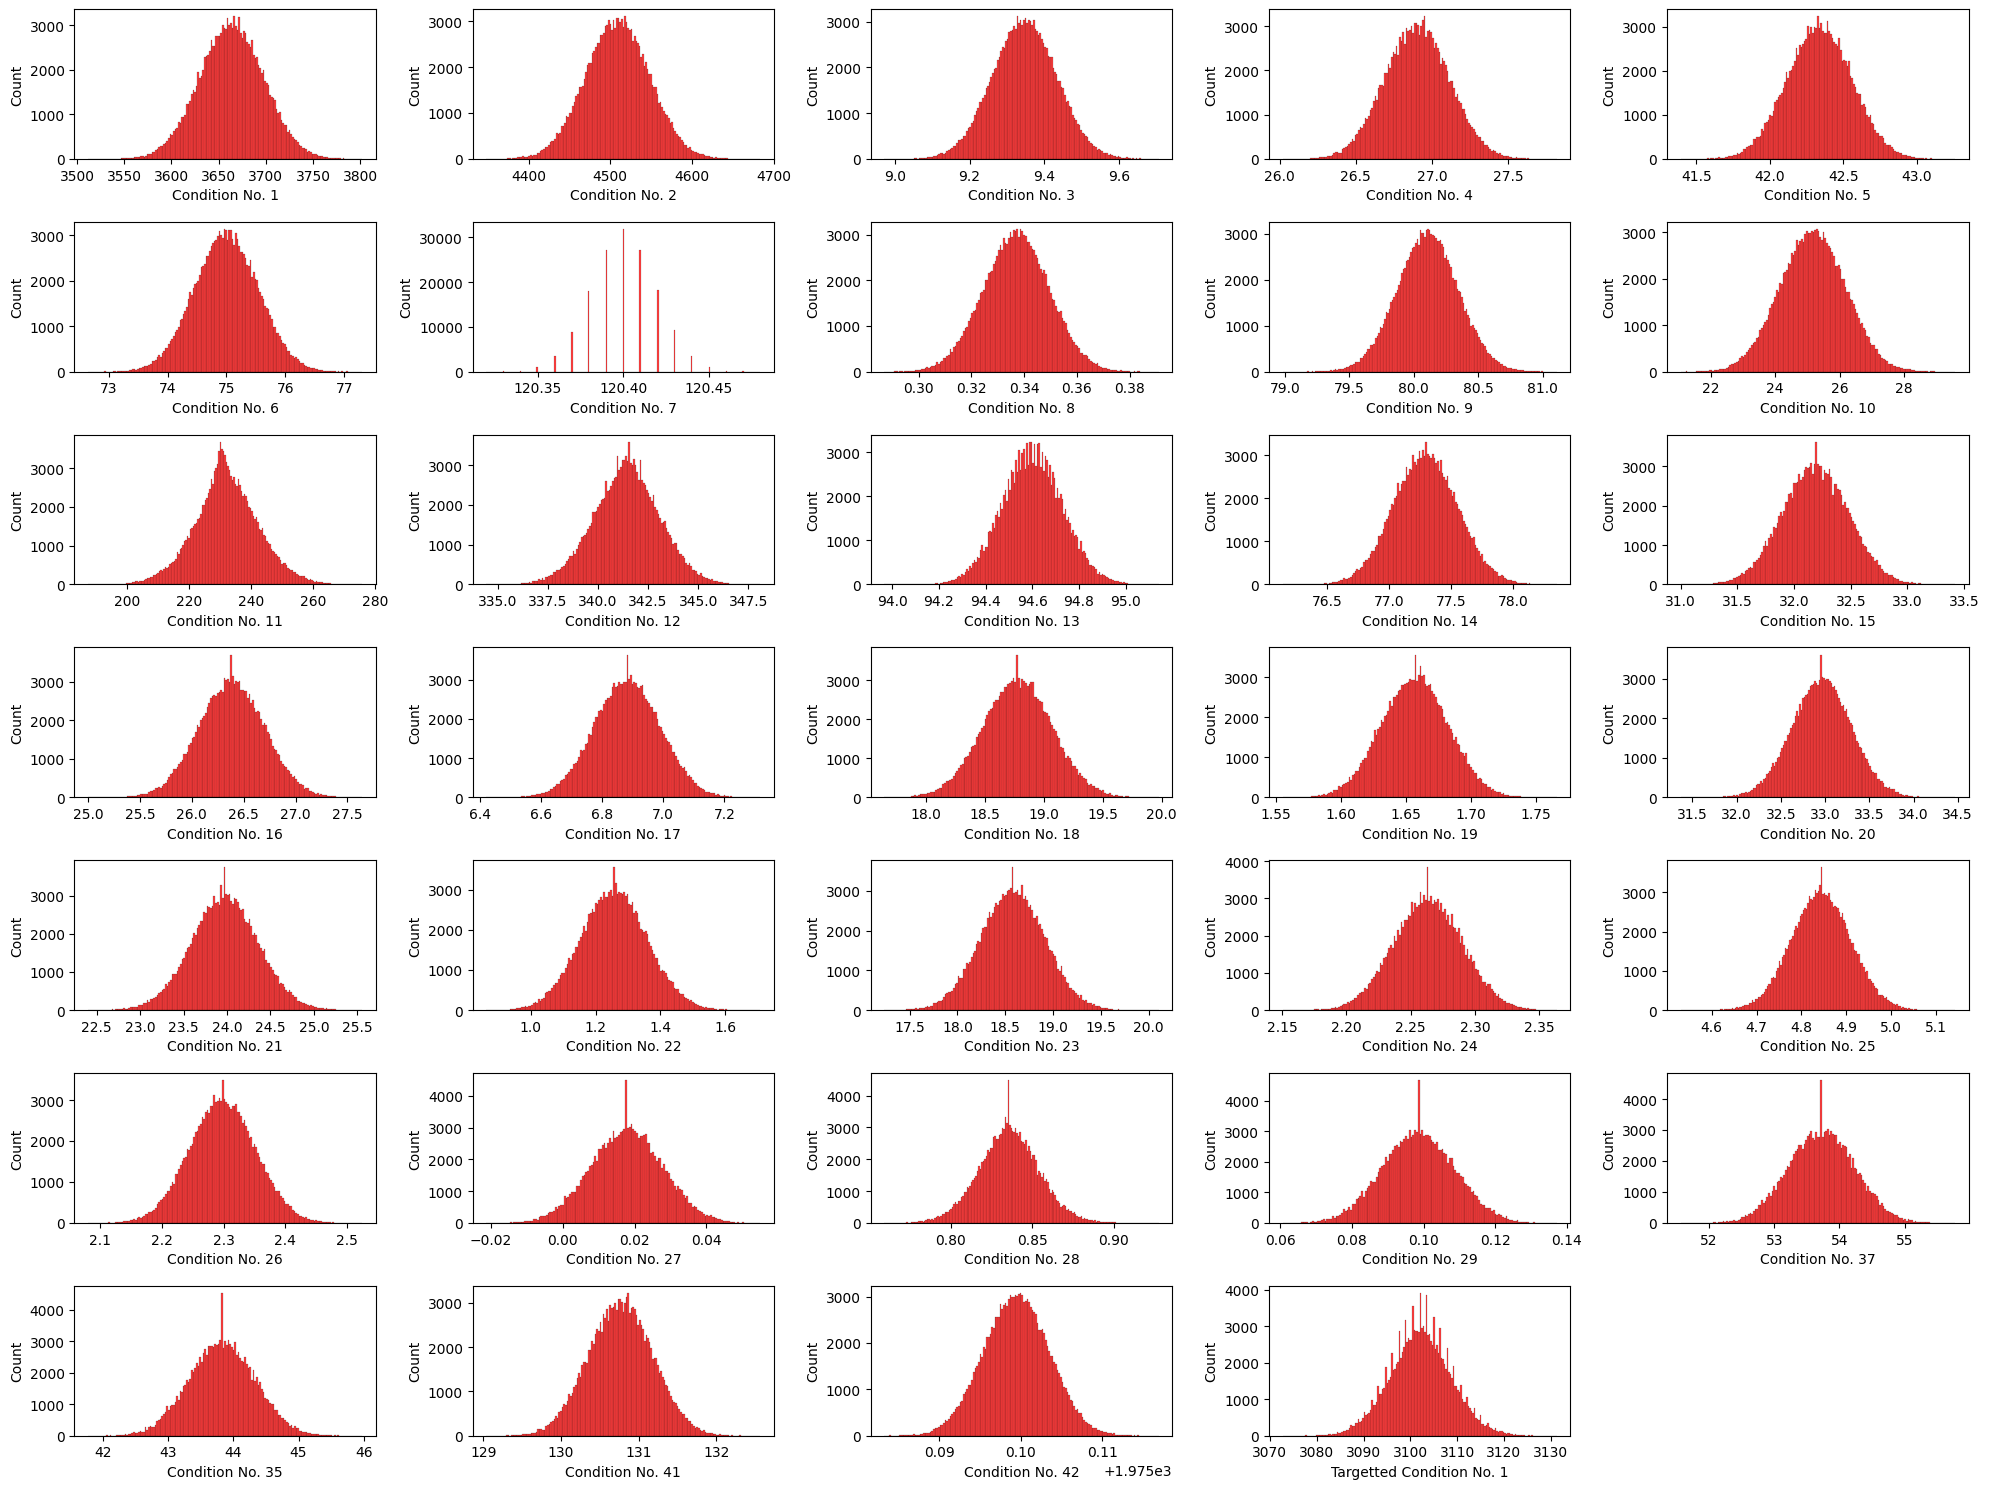

In [4]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 35:
        ax = plt.subplot(7, 5, plotnumber)
        sns.histplot(df[column],color='red',)
        plt.xlabel(column)
    plotnumber += 1 

plt.tight_layout()
plt.show()

In [5]:
df.isnull().sum()

Condition No. 1              0
Condition No. 2              0
Condition No. 3              0
Condition No. 4              0
Condition No. 5              0
Condition No. 6              0
Condition No. 7              0
Condition No. 8              0
Condition No. 9              0
Condition No. 10             0
Condition No. 11             0
Condition No. 12             0
Condition No. 13             0
Condition No. 14             0
Condition No. 15             0
Condition No. 16             0
Condition No. 17             0
Condition No. 18             0
Condition No. 19             0
Condition No. 20             0
Condition No. 21             0
Condition No. 22             0
Condition No. 23             0
Condition No. 24             0
Condition No. 25             0
Condition No. 26             0
Condition No. 27             0
Condition No. 28             0
Condition No. 29             0
Condition No. 37             0
Condition No. 35             0
Condition No. 41             0
Conditio

In [6]:
df.shape

(150269, 34)

In [30]:
df.rename(columns = {'Targetted Condition No. 1': 'target'}, inplace = True)

In [8]:
df.describe()

,Condition No. 1,Condition No. 2,Condition No. 3,Condition No. 4,Condition No. 5,Condition No. 6,Condition No. 7,Condition No. 8,Condition No. 9,Condition No. 10,...,Condition No. 25,Condition No. 26,Condition No. 27,Condition No. 28,Condition No. 29,Condition No. 37,Condition No. 35,Condition No. 41,Condition No. 42,target
count,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,...,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000,150269.000000
mean,3663.815070,4508.906174,9.346916,26.901961,42.337066,74.999139,120.400137,0.337004,80.106854,25.162034,...,4.843737,2.298236,0.017855,0.835718,0.098556,53.726991,43.823728,130.769231,1975.099455,3102.225719
std,33.978882,39.085940,0.085905,0.211489,0.219083,0.541456,0.019128,0.012541,0.238544,1.017391,...,0.066220,0.053355,0.009935,0.018480,0.010032,0.506274,0.502766,0.414843,0.004021,6.527213
min,3511.800000,4348.300000,8.972700,26.019000,41.394000,72.649000,120.320000,0.286980,78.980000,21.070000,...,4.531100,2.080400,-0.021217,0.759230,0.060641,51.564000,41.768000,129.037269,1975.083281,3072.700000
25%,3640.700000,4482.500000,9.288900,26.758000,42.188000,74.631000,120.390000,0.328580,79.947000,24.473000,...,4.799100,2.262100,0.011118,0.823740,0.091752,53.382000,43.484000,130.486846,1975.096731,3097.900000
50%,3663.800000,4509.000000,9.346900,26.903000,42.337000,74.997000,120.400000,0.337060,80.107000,25.165000,...,4.843600,2.298300,0.017866,0.835700,0.098577,53.724000,43.828000,130.771269,1975.099466,3102.200000
75%,3686.800000,4535.300000,9.405000,27.045000,42.486000,75.369000,120.410000,0.345440,80.266000,25.851000,...,4.888500,2.334300,0.024531,0.847740,0.105360,54.071000,44.166000,131.049808,1975.102178,3106.500000
max,3802.100000,4683.700000,9.704800,27.818000,43.257000,77.308000,120.480000,0.390980,81.110000,29.569000,...,5.141700,2.524500,0.055001,0.927530,0.137180,55.773000,45.979000,132.566077,1975.116874,3131.300000


In [13]:
# split data into train and test
X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.0001, random_state = 355)



In [5]:
from sklearn.utils import all_estimators

regressor_models = []
for name, RegressorClass in all_estimators(type_filter='regressor'):
    try:
        regressor = RegressorClass()
        regressor_models.append((name, regressor))
    except Exception as e:
        pass

regressor_models


[('ARDRegression', ARDRegression()),
 ('AdaBoostRegressor', AdaBoostRegressor()),
 ('BaggingRegressor', BaggingRegressor()),
 ('BayesianRidge', BayesianRidge()),
 ('CCA', CCA()),
 ('DecisionTreeRegressor', DecisionTreeRegressor()),
 ('DummyRegressor', DummyRegressor()),
 ('ElasticNet', ElasticNet()),
 ('ElasticNetCV', ElasticNetCV()),
 ('ExtraTreeRegressor', ExtraTreeRegressor()),
 ('ExtraTreesRegressor', ExtraTreesRegressor()),
 ('GammaRegressor', GammaRegressor()),
 ('GaussianProcessRegressor', GaussianProcessRegressor()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
 ('HuberRegressor', HuberRegressor()),
 ('IsotonicRegression', IsotonicRegression()),
 ('KNeighborsRegressor', KNeighborsRegressor()),
 ('KernelRidge', KernelRidge()),
 ('Lars', Lars()),
 ('LarsCV', LarsCV()),
 ('Lasso', Lasso()),
 ('LassoCV', LassoCV()),
 ('LassoLars', LassoLars()),
 ('LassoLarsCV', LassoLarsCV()),
 ('LassoLarsIC', Lass

In [6]:
regressor_models1 = regressor_models[:10]
regressor_models2 = regressor_models[10:20]
regressor_models3 = regressor_models[20:30]
regressor_models4 = regressor_models[30:40]
regressor_models5 = regressor_models[40:51]


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score

def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'Model Name = {type(model).__name__}, r2_score = {r2}')

In [14]:
for model in regressor_models1:
    try:
        print(f'Running {type(model[1]).__name__}')
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        print(ans)
    except Exception as e:
        pass

Running ARDRegression
Model Name = ARDRegression, r2_score = 0.7354361647825582
None
Running AdaBoostRegressor
Model Name = AdaBoostRegressor, r2_score = 0.6581485762657138
None
Running BaggingRegressor
Model Name = BaggingRegressor, r2_score = 0.7603135391668825
None
Running BayesianRidge
Model Name = BayesianRidge, r2_score = 0.737312729029828
None
Running CCA
Running DecisionTreeRegressor
Model Name = DecisionTreeRegressor, r2_score = 0.5608482074563577
None
Running DummyRegressor
Model Name = DummyRegressor, r2_score = -8.125822081872514e-08
None
Running ElasticNet
Model Name = ElasticNet, r2_score = 0.4698011410683284
None
Running ElasticNetCV
Model Name = ElasticNetCV, r2_score = 0.6280450419132533
None
Running ExtraTreeRegressor
Model Name = ExtraTreeRegressor, r2_score = 0.5084115357677083
None


In [18]:
for model in regressor_models2:
    try:
        print(f'Running {type(model[1]).__name__}')
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        print(ans)
    except Exception as e:
        pass

Running ExtraTreesRegressor
Model Name = ExtraTreesRegressor, r2_score = 0.8012127316046559
None
Running GammaRegressor
Model Name = GammaRegressor, r2_score = 0.47622548423893907
None
Running GaussianProcessRegressor
Running GradientBoostingRegressor
Model Name = GradientBoostingRegressor, r2_score = 0.7140192182223297
None
Running HistGradientBoostingRegressor
Model Name = HistGradientBoostingRegressor, r2_score = 0.7313765293425657
None
Running HuberRegressor


/home/arrry/.local/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Name = HuberRegressor, r2_score = 0.6254181268407448
None
Running IsotonicRegression
Running KNeighborsRegressor
Model Name = KNeighborsRegressor, r2_score = 0.34270645663811694
None
Running KernelRidge
Running Lars


/home/arrry/.local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Model Name = Lars, r2_score = 0.7373132559248173
None


In [19]:
for model in regressor_models3:
    try:
        print(f'Running {type(model[1]).__name__}')
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        print(ans)
    except Exception as e:
        pass

Running LarsCV


/home/arrry/.local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Model Name = LarsCV, r2_score = 0.7373132559248173
None
Running Lasso
Model Name = Lasso, r2_score = 0.44024364571467545
None
Running LassoCV
Model Name = LassoCV, r2_score = 0.6687852145939008
None
Running LassoLars
Model Name = LassoLars, r2_score = -8.125822081872514e-08
None
Running LassoLarsCV


/home/arrry/.local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/arrry/.local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a

Model Name = LassoLarsCV, r2_score = 0.7373132559248173
None
Running LassoLarsIC


/home/arrry/.local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Model Name = LassoLarsIC, r2_score = 0.7373132559248173
None
Running LinearRegression
Model Name = LinearRegression, r2_score = 0.7373032305383167
None
Running LinearSVR


/home/arrry/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Name = LinearSVR, r2_score = 0.5835622203319649
None
Running MLPRegressor
Model Name = MLPRegressor, r2_score = 0.45556076204286455
None
Running MultiTaskElasticNet


In [20]:
for model in regressor_models4:
    try:
        print(f'Running {type(model[1]).__name__}')
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        print(ans)
    except Exception as e:
        pass

Running MultiTaskElasticNetCV
Running MultiTaskLasso
Running MultiTaskLassoCV
Running NuSVR


In [8]:
for model in regressor_models5:
    try:
        print(f'Running {type(model[1]).__name__}')
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        print(ans)
    except Exception as e:
        pass

Running QuantileRegressor
Running RANSACRegressor
Model Name = RANSACRegressor, r2_score = 0.3649473614347031
None
Running RadiusNeighborsRegressor


/home/arrry/.local/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:482: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Running RandomForestRegressor
Model Name = RandomForestRegressor, r2_score = 0.7883042652822412
None
Running Ridge
Model Name = Ridge, r2_score = 0.737289232664015
None
Running RidgeCV
Model Name = RidgeCV, r2_score = 0.7373128888985865
None
Running SGDRegressor
Model Name = SGDRegressor, r2_score = -1.0249629512753412e+30
None
Running SVR
Model Name = SVR, r2_score = 0.11131967627354822
None
Running TheilSenRegressor


: 

: 

In [8]:
# ExtraTreesRegressor is selected as it was giving highest r^2 score baseline
from  sklearn.ensemble import ExtraTreesRegressor

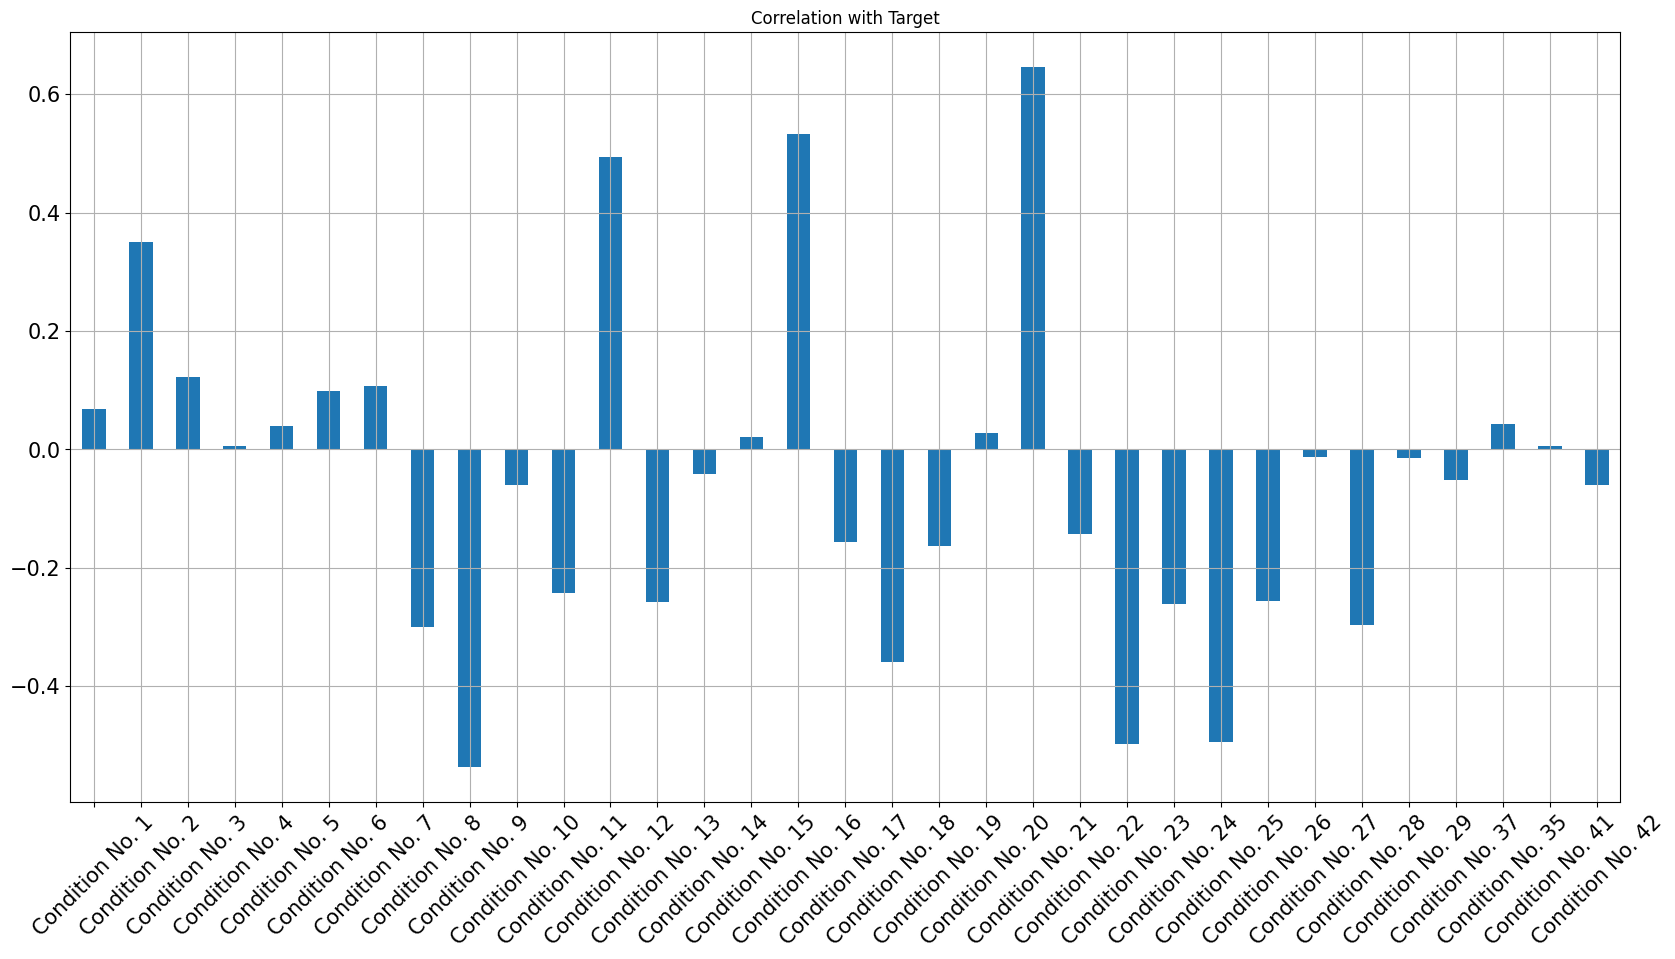

In [32]:
# Correlation
X = df.drop('target', axis=1)
y = df['target']
X.corrwith(y).plot.bar(figsize=(20, 10), title="Correlation with Target", fontsize=15, rot=45, grid=True)
plt.show()

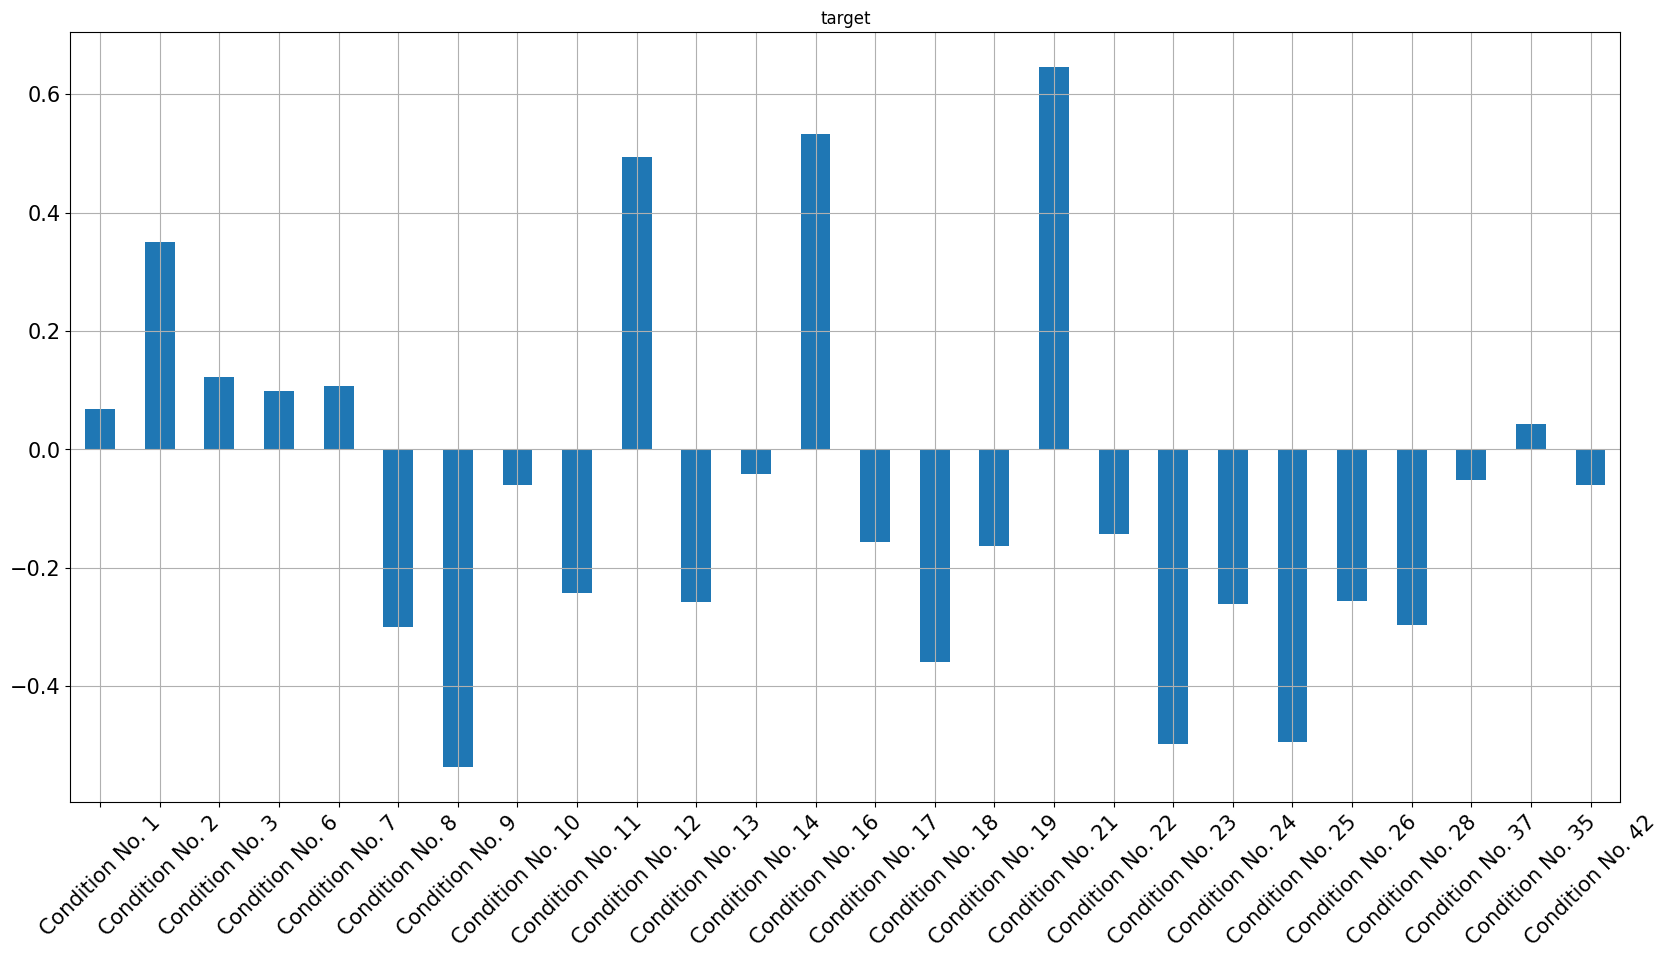

In [33]:
# Dropping less significant Columns
X = X.drop(X.corrwith(y)[abs(X.corrwith(y)) < 0.04].index, axis=1)
X.corrwith(y).plot.bar(figsize=(20,10), title="target", fontsize=15, rot=45, grid=True)
plt.show()

In [9]:
model = ExtraTreesRegressor(n_estimators=100, random_state=0)
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f'Model Name = {type(model).__name__}, r2_score = {r2}')

Model Name = ExtraTreesRegressor, r2_score = 1.0


In [14]:
print(X.columns)
len(X.columns)

Index(['Condition No. 1', 'Condition No. 2', 'Condition No. 3',
       'Condition No. 6', 'Condition No. 7', 'Condition No. 8',
       'Condition No. 9', 'Condition No. 10', 'Condition No. 11',
       'Condition No. 12', 'Condition No. 13', 'Condition No. 14',
       'Condition No. 16', 'Condition No. 17', 'Condition No. 18',
       'Condition No. 19', 'Condition No. 21', 'Condition No. 22',
       'Condition No. 23', 'Condition No. 24', 'Condition No. 25',
       'Condition No. 26', 'Condition No. 28', 'Condition No. 37',
       'Condition No. 35', 'Condition No. 42'],
      dtype='object')


26

In [22]:
df2 = pd.read_csv("../data/Evaluation Dataset.csv")
df2 = df2[X.columns]
df2.head()

,Condition No. 1,Condition No. 2,Condition No. 3,Condition No. 4,Condition No. 5,Condition No. 6,Condition No. 7,Condition No. 8,Condition No. 9,Condition No. 10,...,Condition No. 24,Condition No. 25,Condition No. 26,Condition No. 27,Condition No. 28,Condition No. 29,Condition No. 37,Condition No. 35,Condition No. 41,Condition No. 42
0,3633.0,4491.6,9.3233,27.020,42.401,74.366,120.42,0.34398,80.054,26.191,...,2.2794,4.8459,2.3389,-0.002351,0.85592,0.092412,53.696,43.342,131.000769,1975.103522
1,3654.7,4526.4,9.2720,26.838,42.280,75.423,120.40,0.34092,79.798,25.120,...,2.2798,4.8528,2.2791,0.003044,0.83471,0.117330,54.647,43.590,130.643769,1975.099289
2,3655.9,4468.3,9.3669,26.702,41.850,75.461,120.40,0.36692,80.222,23.749,...,2.2694,4.7115,2.2466,0.024026,0.81435,0.099781,53.348,44.683,130.377000,1975.093870
3,3689.9,4532.0,9.4211,26.918,42.311,73.959,120.41,0.34800,80.085,25.954,...,2.2522,4.8880,2.3085,0.027168,0.83669,0.092316,53.861,43.891,130.800692,1975.102585
4,3687.9,4494.1,9.5047,26.565,42.208,75.249,120.40,0.34721,80.130,25.739,...,2.2967,4.9020,2.2538,0.016510,0.80269,0.101690,53.474,43.455,130.108269,1975.101735


In [23]:
df2['Predicted'] = 0

In [24]:
model = ExtraTreesRegressor(n_estimators=100, random_state=0)
model.fit(X, y)
df2['Predicted'] = model.predict(df2[X.columns])
df2.head()

,Condition No. 1,Condition No. 2,Condition No. 3,Condition No. 4,Condition No. 5,Condition No. 6,Condition No. 7,Condition No. 8,Condition No. 9,Condition No. 10,...,Condition No. 25,Condition No. 26,Condition No. 27,Condition No. 28,Condition No. 29,Condition No. 37,Condition No. 35,Condition No. 41,Condition No. 42,Predicted
0,3633.0,4491.6,9.3233,27.020,42.401,74.366,120.42,0.34398,80.054,26.191,...,4.8459,2.3389,-0.002351,0.85592,0.092412,53.696,43.342,131.000769,1975.103522,3100.300
1,3654.7,4526.4,9.2720,26.838,42.280,75.423,120.40,0.34092,79.798,25.120,...,4.8528,2.2791,0.003044,0.83471,0.117330,54.647,43.590,130.643769,1975.099289,3098.893
2,3655.9,4468.3,9.3669,26.702,41.850,75.461,120.40,0.36692,80.222,23.749,...,4.7115,2.2466,0.024026,0.81435,0.099781,53.348,44.683,130.377000,1975.093870,3102.100
3,3689.9,4532.0,9.4211,26.918,42.311,73.959,120.41,0.34800,80.085,25.954,...,4.8880,2.3085,0.027168,0.83669,0.092316,53.861,43.891,130.800692,1975.102585,3101.262
4,3687.9,4494.1,9.5047,26.565,42.208,75.249,120.40,0.34721,80.130,25.739,...,4.9020,2.2538,0.016510,0.80269,0.101690,53.474,43.455,130.108269,1975.101735,3096.900


In [18]:
df2['Id'] = df2.index
df2 = df2[['Id', 'Predicted']]
df2.head()

,Id,Predicted
0,0,3100.300
1,1,3098.893
2,2,3102.100
3,3,3101.262
4,4,3096.900


In [21]:
# save the df2 to a csv file
df2.to_csv('../data/submission.csv', index=False)